In [41]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 
import os

In [60]:
subject_id = 'EB036'
date = '2024-03-22'
exp_kwargs = {
    'subject': subject_id,
    'expDate': date,
    }

In [72]:

def houghCircleTransform(frame):

    gray_img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Apply Gaussian blur to the image
    gray_img = cv2.medianBlur(gray_img, 21)

    circles = cv2.HoughCircles(gray_img, cv2.HOUGH_GRADIENT, dp=2, param1=50, param2= 20,minDist=90, minRadius=103, maxRadius=105)

    if circles is not None:
        circles = np.uint16(np.around(circles))
        
        # Get the first/best circle
        if len(circles[0]) > 0:
            # Take the first circle (usually the strongest detection)
            circle = circles[0][0]
            
            # Draw the outer circle
            cv2.circle(frame, (circle[0], circle[1]), circle[2], (0, 255, 0), 2)
            # Draw the center of the circle
            cv2.circle(frame, (circle[0], circle[1]), 2, (0, 0, 255), 3)

        plt.figure()
        plt.imshow(frame)
        plt.show()

        return True, circle

    else:
        return False, None
    

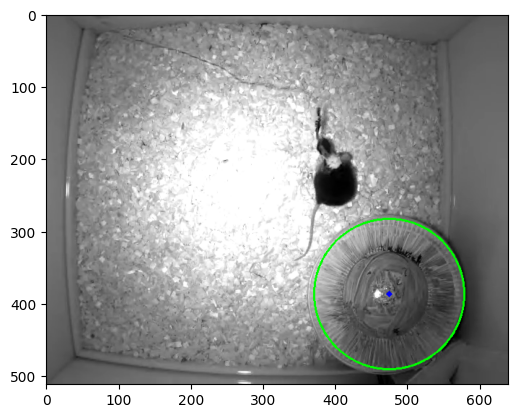

In [74]:
cap = cv2.VideoCapture(fr'\\znas\Lab\Share\Maja\labelled_DLC_videos\{subject_id}_{date}.mp4')

if cap.isOpened():
    
    cap.set(cv2.CAP_PROP_POS_FRAMES,60)
    ret, frame = cap.read()
    
    
    houghCircleTransform(frame)
    
    

    
    